### Sam Ockunzzi
2697186

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from scipy import ndimage, signal
import sys,os
import math
%config Completer.use_jedi = False

## LOAD IMG

In [2]:
img_bin = np.load('CIS_465/FE_Data.npy')
img_1 = img_bin[0]
img_2 = img_bin[1]

In [3]:
def display_img(img, gray=False):
    '''
    img = input image or image like array
    gray = bool for displaying a grayscale image
    '''
    plt.axis('off')
    if(gray):
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
        plt.show()
    else:
        plt.imshow(img)
        plt.show()

In [4]:
img_bin.shape

(2, 192, 168)

In [5]:
img_1.shape

(192, 168)

## DISPLAY ORIGIONAL IMGS

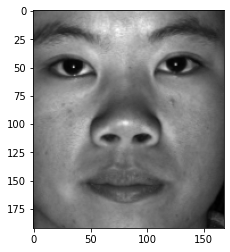

In [6]:
plt.imshow(img_1, cmap='gray')

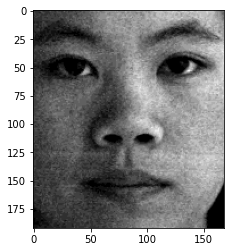

In [7]:
plt.imshow(img_2, cmap='gray')

In [8]:
sqrt2=math.sqrt(2)

## SETUP KERNALS

In [9]:
k1=[
    [1,sqrt2,1],
    [0,0,0],
    [-1,-sqrt2,-1]
]

k2=[
    [1,0,-1],
    [sqrt2,0,-sqrt2],
    [1,0,-1]
]

k3=[
    [0,-1,sqrt2],
    [1,0,-1],
    [-sqrt2,1,0]
]

k4=[
    [sqrt2,-1,0],
    [-1,0,1],
    [0,1,-sqrt2]
]

k5=[
    [0,1,0],
    [-1,0,-1],
    [0,1,0]
]

k6=[
    [-1,0,1],
    [0,0,0],
    [1,0,-1]
]
k7=[
    [1,-2,1],
    [-2,4,-2],
    [1,-2,1]
]
k8=[
    [-2,1,-2],
    [1,4,1],
    [-2,1,-2]
]
k9=[
    [1,1,1],
    [1,1,1],
    [1,1,1]
]
k_kernals = [k1,k2,k3,k4,k5,k6,k7,k8,k9]

In [10]:
k_kernals[0]

[[1, 1.4142135623730951, 1], [0, 0, 0], [-1, -1.4142135623730951, -1]]

## CONVOLVING KERNALS OVER IMAGE

In [11]:
outimg=[]
for i in k_kernals:
    outimg.append(signal.convolve(img_1, i, mode='full', method='direct'))

In [12]:
len(outimg)

9

## CONVOLVED IMAGES

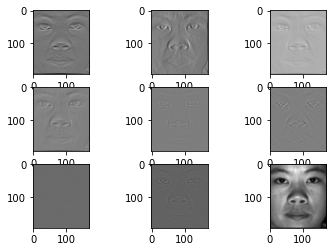

In [13]:
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(outimg[0],cmap='gray')
axarr[0,1].imshow(outimg[1],cmap='gray')
axarr[0,2].imshow(outimg[2],cmap='gray')
axarr[1,0].imshow(outimg[3],cmap='gray')
axarr[1,1].imshow(outimg[4],cmap='gray')
axarr[1,2].imshow(outimg[5],cmap='gray')
axarr[2,0].imshow(outimg[6],cmap='gray')
axarr[2,1].imshow(outimg[7],cmap='gray')
axarr[2,2].imshow(outimg[8],cmap='gray')

In [14]:
E1=np.sqrt((outimg[0]**2 + outimg[1]**2 + outimg[2]**2 + outimg[3]**2)
           /
           (outimg[0]**2 + outimg[1]**2 + outimg[2]**2 + outimg[3]**2 + outimg[4]**2 + outimg[5]**2 + outimg[6]**2 + outimg[7]**2 + outimg[8]**2))

In [15]:
E1

array([[0.60302269, 0.70709451, 0.6186074 , ..., 0.62716505, 0.70619419,
        0.60302269],
       [0.70710678, 0.51396509, 0.46318447, ..., 0.47062093, 0.54464944,
        0.70619419],
       [0.61938131, 0.4588579 , 0.03047537, ..., 0.05233601, 0.46443876,
        0.63003424],
       ...,
       [0.62221593, 0.50501022, 0.11562286, ..., 0.31193052, 0.46683519,
        0.62844216],
       [0.70707331, 0.54156863, 0.45796241, ..., 0.54574822, 0.54965852,
        0.69530009],
       [0.60302269, 0.70535796, 0.62492822, ..., 0.61810655, 0.70603327,
        0.60302269]])

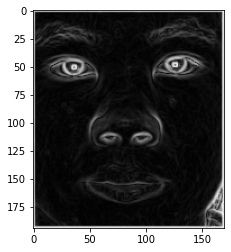

In [16]:
plt.imshow(E1, cmap='gray')

## ENCODING IMAGE

In [17]:
def encode_arr(array):
    '''
    Takes an array and returns encoded array
    '''
    #Take array, pad with 0's then slide window over array and save frames to array.
    array_pad=np.pad(array,pad_width=1)
    array_windows=np.lib.stride_tricks.sliding_window_view(array_pad,(3,3))
    #Init empty array for storage
    encoded_arr=[]
    for row_windows in array_windows:
        encoded_row=[]
        for window in row_windows:
            #subtract center element from all elements in window and check if greater than 0, then swap bool for int.
            bool_window=(window - window[1,1]) >= 0
            bool_window=bool_window.astype(int)
            
            #Append window elements in specific order to build binary code.
            x=[]
            x.append(str(bool_window[2,2]))
            x.append(str(bool_window[2,1]))
            x.append(str(bool_window[2,0]))
            x.append(str(bool_window[1,0]))
            x.append(str(bool_window[0,0]))
            x.append(str(bool_window[0,1]))
            x.append(str(bool_window[0,2]))
            x.append(str(bool_window[1,2]))
            #take binary code, translate to int and append to new array for return.
            y=''.join(str(element) for element in x)
            encoded_row.append(int(y, 2))
            
        encoded_arr.append(encoded_row)
    return encoded_arr

In [18]:
img1_encode = encode_arr(E1)

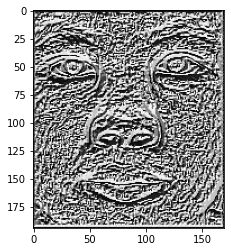

In [19]:
plt.imshow(img1_encode, cmap='gray')

## APPLYING TESTS TO IMAGE 2

In [20]:
outimg=[]
for i in k_kernals:
    outimg.append(signal.convolve(img_2, i, mode='full', method='direct'))

In [21]:
E2=np.sqrt((outimg[0]**2 + outimg[1]**2 + outimg[2]**2 + outimg[3]**2)/(outimg[0]**2 + outimg[1]**2 + outimg[2]**2 + outimg[3]**2 + outimg[4]**2 + outimg[5]**2 + outimg[6]**2 + outimg[7]**2 + outimg[8]**2))

<ipython-input-21-9cb8ed4091bb>:1: RuntimeWarning: invalid value encountered in true_divide
  E2=np.sqrt((outimg[0]**2 + outimg[1]**2 + outimg[2]**2 + outimg[3]**2)/(outimg[0]**2 + outimg[1]**2 + outimg[2]**2 + outimg[3]**2 + outimg[4]**2 + outimg[5]**2 + outimg[6]**2 + outimg[7]**2 + outimg[8]**2))


In [22]:
img2_encode = encode_arr(E2)

## PART 5 OUTPUTS 1 AND 2

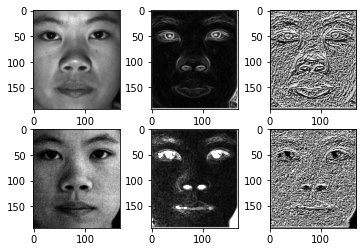

In [23]:
f, axarr = plt.subplots(2,3)
axarr[0,0].imshow(img_1,cmap='gray')
axarr[0,1].imshow(E1,cmap='gray')
axarr[0,2].imshow(img1_encode,cmap='gray')
axarr[1,0].imshow(img_2,cmap='gray')
axarr[1,1].imshow(E2,cmap='gray')
axarr[1,2].imshow(img2_encode,cmap='gray')